<a href="https://colab.research.google.com/github/MamontLara/Bike_rent/blob/main/Bike_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Профіль колонок набору даних:**

**datetime:** дата та час зібрані погодинно

**season:** сезон (1: весна, 2: літо, 3: осінь, 4: зима)

**holiday:** чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)

**workingday:** якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.

**weather:**
Ясно, Мало хмарно, частково хмарно
Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

**temp:** температура в градусах Цельсія

**atemp:** як відчувається температура в градусах Цельсія

**humidity:** вологість

**windspeed:** швидкість вітру

**casual:** кількість неформальних користувачів

**registered:** кількість зареєстрованих користувачів

**count:** загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('drive/MyDrive/Dataset/yulu_rental.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **1. Як температура впливає на кількість орендованих велосипедів?**


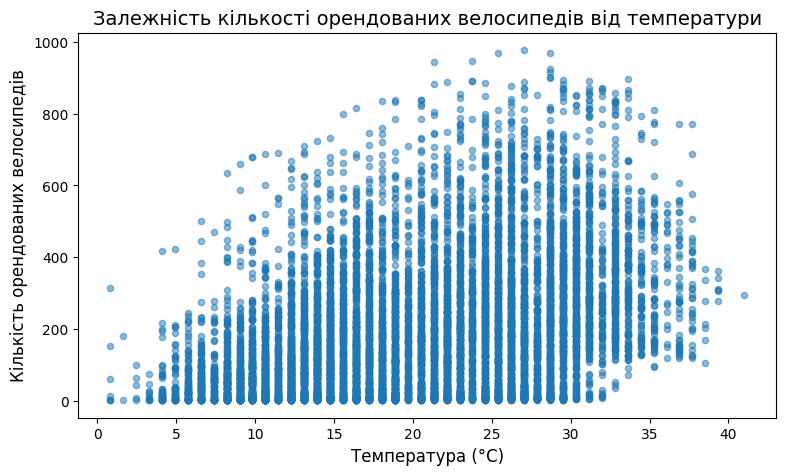

In [5]:
df.plot(kind='scatter', x='temp', y='count', alpha=0.5, figsize=(9, 5))
plt.title('Залежність кількості орендованих велосипедів від температури', fontsize=14)
plt.xlabel('Температура (°C)', fontsize=12)
plt.ylabel('Кількість орендованих велосипедів', fontsize=12);

 Отже, існує позитивний зв'язок між температурою і кількістю орендованих велосипедів. При підвищенні температури кількість орендованих велосипедів збільшується. Це може бути пояснено тим, що при теплішій погоді користувачі більше схильні використовувати велосипеди для поїздок.



# **2. Вплив сезонів на кількість орендованих велосипедів**

In [6]:
grouped_df =df.groupby(by='season')['count'].sum()

In [7]:
grouped_df

,count
season,
1,312498
2,588282
3,640662
4,544034


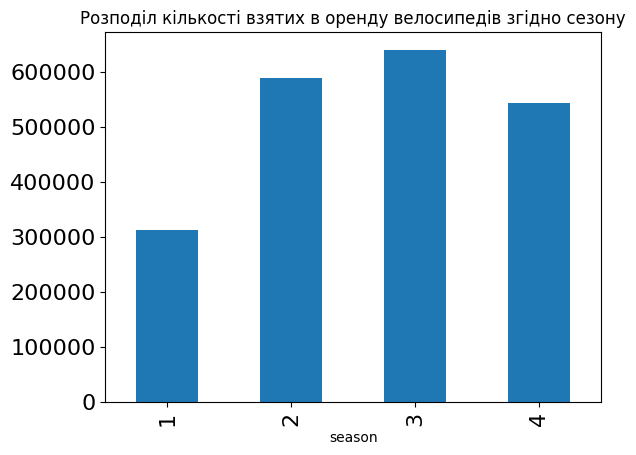

In [8]:
grouped_df.plot(kind='bar', title='Розподіл кількості взятих в оренду велосипедів згідно сезону', fontsize=16)
plt.ticklabel_format(style='plain', axis='y');

*Осінь є найпопулярнішим сезоном для оренди велосипедів.* Це може свідчити про те, що погодні умови в цей час є найбільш сприятливими для їзди на велосипеді, наприклад, менше дощів і комфортні температури.

*Весна має найменшу кількість орендованих велосипедів.* Це може бути через те, що весна в Індії може бути періодом дощів або змінних погодних умов, що робить оренду велосипедів менш привабливою. Також може бути, що люди в цей період зайняті іншими видами активності або подорожами.

# **1. Як швидкість вітру впливає на кількість орендованих велосипедів?**

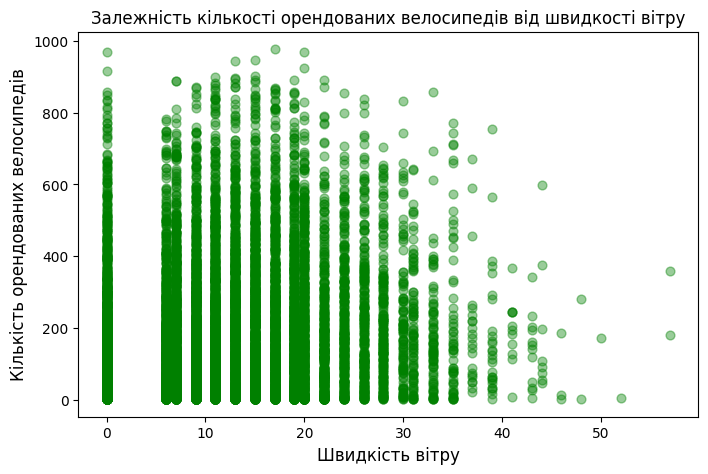

In [9]:
df.plot(kind='scatter', x='windspeed', y='count', color = 'green', alpha=0.4, s=40, figsize=(8,5))
plt.title('Залежність кількості орендованих велосипедів від швидкості вітру', fontsize=12)
plt.xlabel('Швидкість вітру', fontsize=12)
plt.ylabel('Кількість орендованих велосипедів', fontsize=12);


Графік розсіювання демонструє, що з підвищенням швидкості вітру кількість орендованих велосипедів зменшується. Це видно з загальної тенденції, де точкові дані мають тенденцію до зменшення на вертикальній осі (кількість орендованих велосипедів) із збільшенням значень на горизонтальній осі (швидкість вітру).

Зазвичай сильний вітер може створювати несприятливі умови для велосипедних поїздок, такі як відчуття дискомфорту, труднощі в управлінні велосипедом і підвищений ризик аварій. Це може знижувати бажання користувачів орендувати  велосипеди в умовах сильного вітру.


Аналіз даних показує, що погодні умови суттєво впливають на кількість орендованих велосипедів. Результати трьох діаграм демонструють, що температура, швидкість вітру та сезонні зміни мають значний ефект на попит на велосипеди:

*Температура:* Збільшення температури позитивно корелює з кількістю орендованих велосипедів, що підтверджує тенденцію, що люди більше користуються велосипедами в теплішу погоду.

*Швидкість вітру:* Зі збільшенням швидкості вітру кількість орендованих велосипедів зменшується. Сильний вітер може створювати дискомфорт і знижувати привабливість велосипедних поїздок.

*Сезонні зміни:* Кількість орендованих велосипедів варіюється залежно від сезону, з піком у осінній період і зниженням у зимовий. Це вказує на явний сезонний попит, який варто враховувати при плануванні послуг.

***Рекомендації***

# *Спеціальні пропозиції для літніх місяців:*

Запровадження акційних знижок на оренду велосипедів в спекотні літні місяці. Наприклад, пропонувати знижки в години пікової спеки або безкоштовну додаткову годину оренди для нових користувачів.


# *Рекламні кампанії:*

Розробити рекламні кампанії, які підкреслюють переваги використання велосипедів в теплій погоді. Включити до них інформацію про насолоду від природи, зручність переміщення без пробок та збереження здоров’я.


# *Охолоджувальні системи:*

Можна встановити охолоджувальні системи або розпилювачі води на великих парковках та в зонах оренди велосипедів. Це допоможе зробити поїздки при високих температурах більш комфортними і приверне більше користувачів.



# *Сезонні тарифні плани та програми лояльності:*

Впровадження різних тарифних планів та програм лояльності для різних сезонів. Наприклад, пропонувати знижки або спеціальні умови оренди в періоди, коли попит знижується, щоб підтримувати стабільний рівень оренди протягом року.


# *Спеціальні послуги в менш популярні періоди:*

Можна організовувати спеціальні тури, події або маршрути для холоднішої погоди. Це може включати зимові велосипедні тури, святкові заходи або маршрути з додатковими зупинками для відпочинку.


Погодні умови мають значний вплив на кількість орендованих велосипедів, і це створює можливості для впровадження стратегій, які можуть оптимізувати попит і задоволеність користувачів. Застосування цих рекомендацій допоможе не лише зберегти стабільний рівень оренди, але і покращити загальний досвід, враховуючи сезонні та погодні умови.